# 1. Data Exploration

### 1.1 Import Libraries

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Set Random Seed
np.random.seed(42)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

### 1.2 Download Dataset

In [2]:
# !kaggle datasets download -d yasserh/housing-prices-dataset
# !unzip housing-prices-dataset.zip

### 1.3 Read and Explore Dataset

We can read the dataset using `pd.read_csv()`.

In [3]:
df = pd.read_csv('Housing.csv')

View the first 5 rows using `df.head()`.

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Get general information about the dataset using `df.info()`.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


View some statistical information about the dataset using `df.describe()`.

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.describe(exclude='number')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


# 2. Data Preprocessing

Explore possible values for categorical columns only using `value_counts()`

In [8]:
for col in [col for col in df.columns if df[col].dtype == 'object']:
  print(df[col].value_counts())
  print('-'*30)

mainroad
yes    468
no      77
Name: count, dtype: int64
------------------------------
guestroom
no     448
yes     97
Name: count, dtype: int64
------------------------------
basement
no     354
yes    191
Name: count, dtype: int64
------------------------------
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
------------------------------
airconditioning
no     373
yes    172
Name: count, dtype: int64
------------------------------
prefarea
no     417
yes    128
Name: count, dtype: int64
------------------------------
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64
------------------------------


### 2.1 Manual Encoding

Feature scaling on the `price` column.

In [9]:
df['price (M)'] = df['price'] / 1000000
df.drop(columns=['price'], inplace=True)

Replacing `(yes,no)` with numerical values `(1,0)` using `data.replace()`.

In [10]:
# Create a copy of the dataset to perform data cleaning and preprocessing
data = df.copy()

In [11]:
data.replace({'yes' : 1, 'no': 0}, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              545 non-null    int64  
 1   bedrooms          545 non-null    int64  
 2   bathrooms         545 non-null    int64  
 3   stories           545 non-null    int64  
 4   mainroad          545 non-null    int64  
 5   guestroom         545 non-null    int64  
 6   basement          545 non-null    int64  
 7   hotwaterheating   545 non-null    int64  
 8   airconditioning   545 non-null    int64  
 9   parking           545 non-null    int64  
 10  prefarea          545 non-null    int64  
 11  furnishingstatus  545 non-null    object 
 12  price (M)         545 non-null    float64
dtypes: float64(1), int64(11), object(1)
memory usage: 55.5+ KB


### 2.2 One Hot Encoding
Perform one hot encoding on the `furnishingstatus` feature using `pd.get_dummies()`.

In [13]:
data = pd.get_dummies(data, columns=['furnishingstatus'], dtype='int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   area                             545 non-null    int64  
 1   bedrooms                         545 non-null    int64  
 2   bathrooms                        545 non-null    int64  
 3   stories                          545 non-null    int64  
 4   mainroad                         545 non-null    int64  
 5   guestroom                        545 non-null    int64  
 6   basement                         545 non-null    int64  
 7   hotwaterheating                  545 non-null    int64  
 8   airconditioning                  545 non-null    int64  
 9   parking                          545 non-null    int64  
 10  prefarea                         545 non-null    int64  
 11  price (M)                        545 non-null    float64
 12  furnishingstatus_furni

### 2.3 Check for duplicated and null values
We can check if the dataset has duplicated values using `df.duplicated().sum()` or has null values using `df.isnull().sum()`.

In [14]:
print(f'Number of duplicated values : {data.duplicated().sum()}')
print(f'Number of null values : {sum(data.isnull().sum().to_list())}')

Number of duplicated values : 0
Number of null values : 0


# 3. Exploratory Data Analysis (EDA)

### 3.1 Univariate Analysis

#### 3.1.1 Price

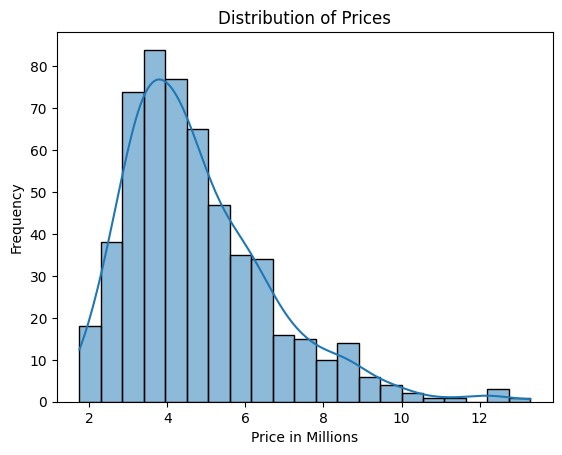

In [15]:
sns.histplot(df['price (M)'], kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price in Millions')
plt.ylabel('Frequency')
plt.show()

We can see that prices approximately ranges from <u>**1.7 to 13 million dollars**</u> and most of the prices are in the range from <u>**3 to 6 million dollars**</u>.

#### 3.1.2 Bedrooms

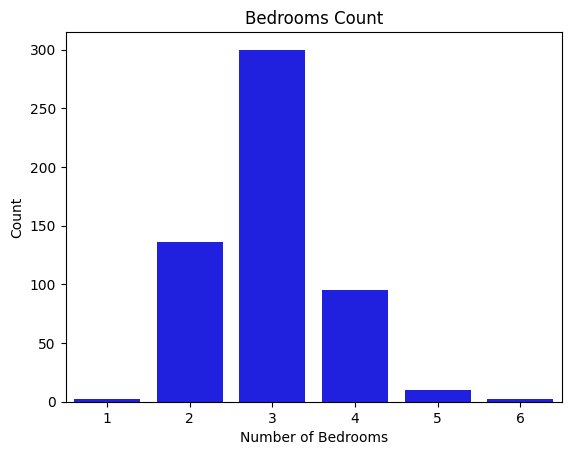

In [16]:
sns.countplot(data=df, x='bedrooms', palette=['blue'])
plt.title('Bedrooms Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

We can notice that 3 bedrooms houses are the most common type, while 1 and 6 bedrom houses are the least common type of houses.

#### 3.1.3 Furnishing Status

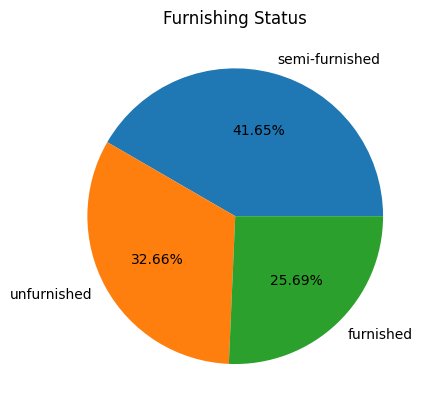

In [17]:
plt.pie(
    x=df['furnishingstatus'].value_counts(),
    labels=df['furnishingstatus'].value_counts().index,
    autopct='%1.2f%%',
)
plt.title('Furnishing Status')
plt.show()

We can see that semi-furnished houses are the most common type with 41.65%

### 3.2 Bivariate Analysis

#### 3.2.1 Area vs Price

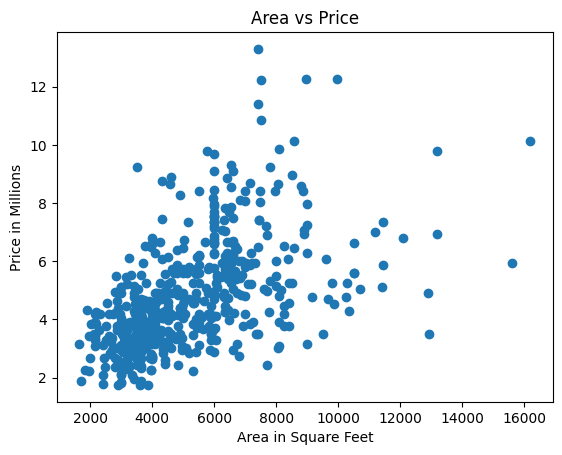

In [18]:
plt.scatter(data=df, x='area', y='price (M)')
plt.title('Area vs Price')
plt.xlabel('Area in Square Feet')
plt.ylabel('Price in Millions')
plt.show()

We can notice that the price of the house increases as the area of the house increases as well. But There are some large houses cheaper than small houses.

#### 3.2.2 Bedrooms vs Price

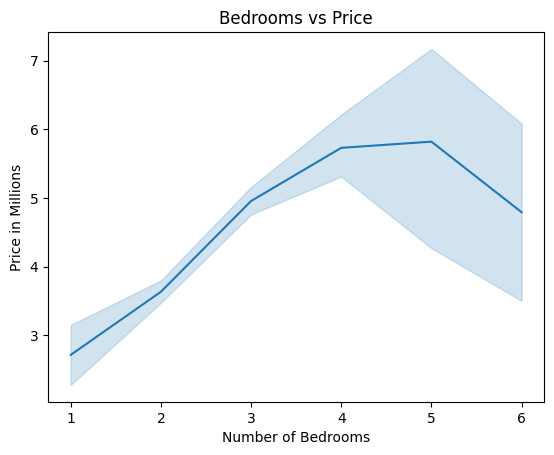

In [19]:
sns.lineplot(data=df, x='bedrooms', y='price (M)')
plt.title('Bedrooms vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Millions')
plt.show()

We can see that the houses with many bedrooms usually considered more expensive than the houses with fewer bedrooms.

#### 3.2.3 Mainroad vs Price

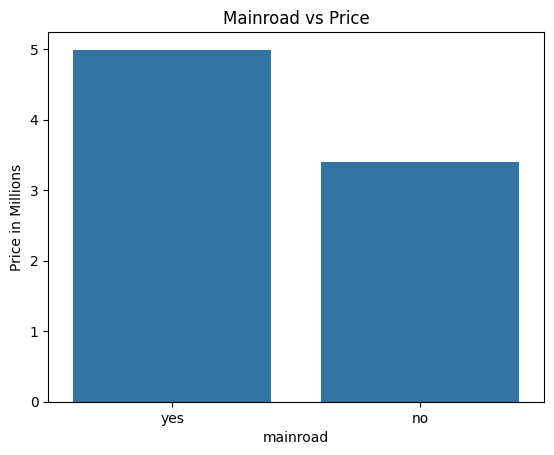

In [20]:
sns.barplot(data=df, x='mainroad', y='price (M)', ci=None)
plt.title('Mainroad vs Price')
plt.ylabel('Price in Millions')
plt.show()

We can notice that the houses located at the mainroad are more expensive than the houses located elsewhere.

#### 3.2.4 Mainroad vs Furnishing Status

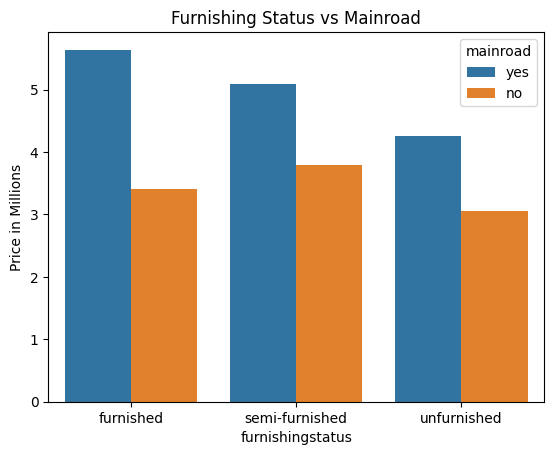

In [21]:
sns.barplot(data=df, x='furnishingstatus', y='price (M)', hue='mainroad', ci=None)
plt.title('Furnishing Status vs Mainroad')
plt.ylabel('Price in Millions')
plt.show()

We can notice that furnished mainroad houses are the most expensive type of houses.

### 3.3 Multivariate Analysis

#### 3.3.1 Catplot

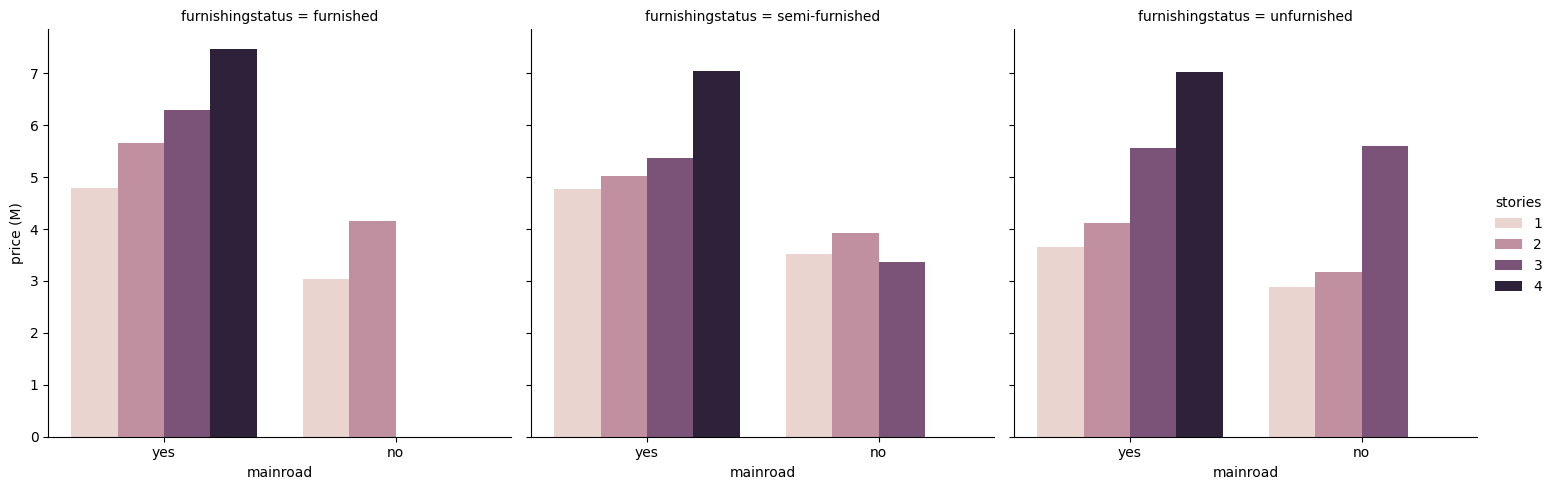

In [22]:
sns.catplot(data=df, x='mainroad', y='price (M)', hue='stories', col='furnishingstatus', kind='bar', ci=None)
plt.show()

We can see that mainroad houses have variety of stories unlike the non-mainroad houses. We can also notice that the more stories the house have, the more expensive its price will be. Another insight we can see here is that 3 stories houses are the most common type of house among the unfurnished houses.

#### 3.3.2 Pairplot

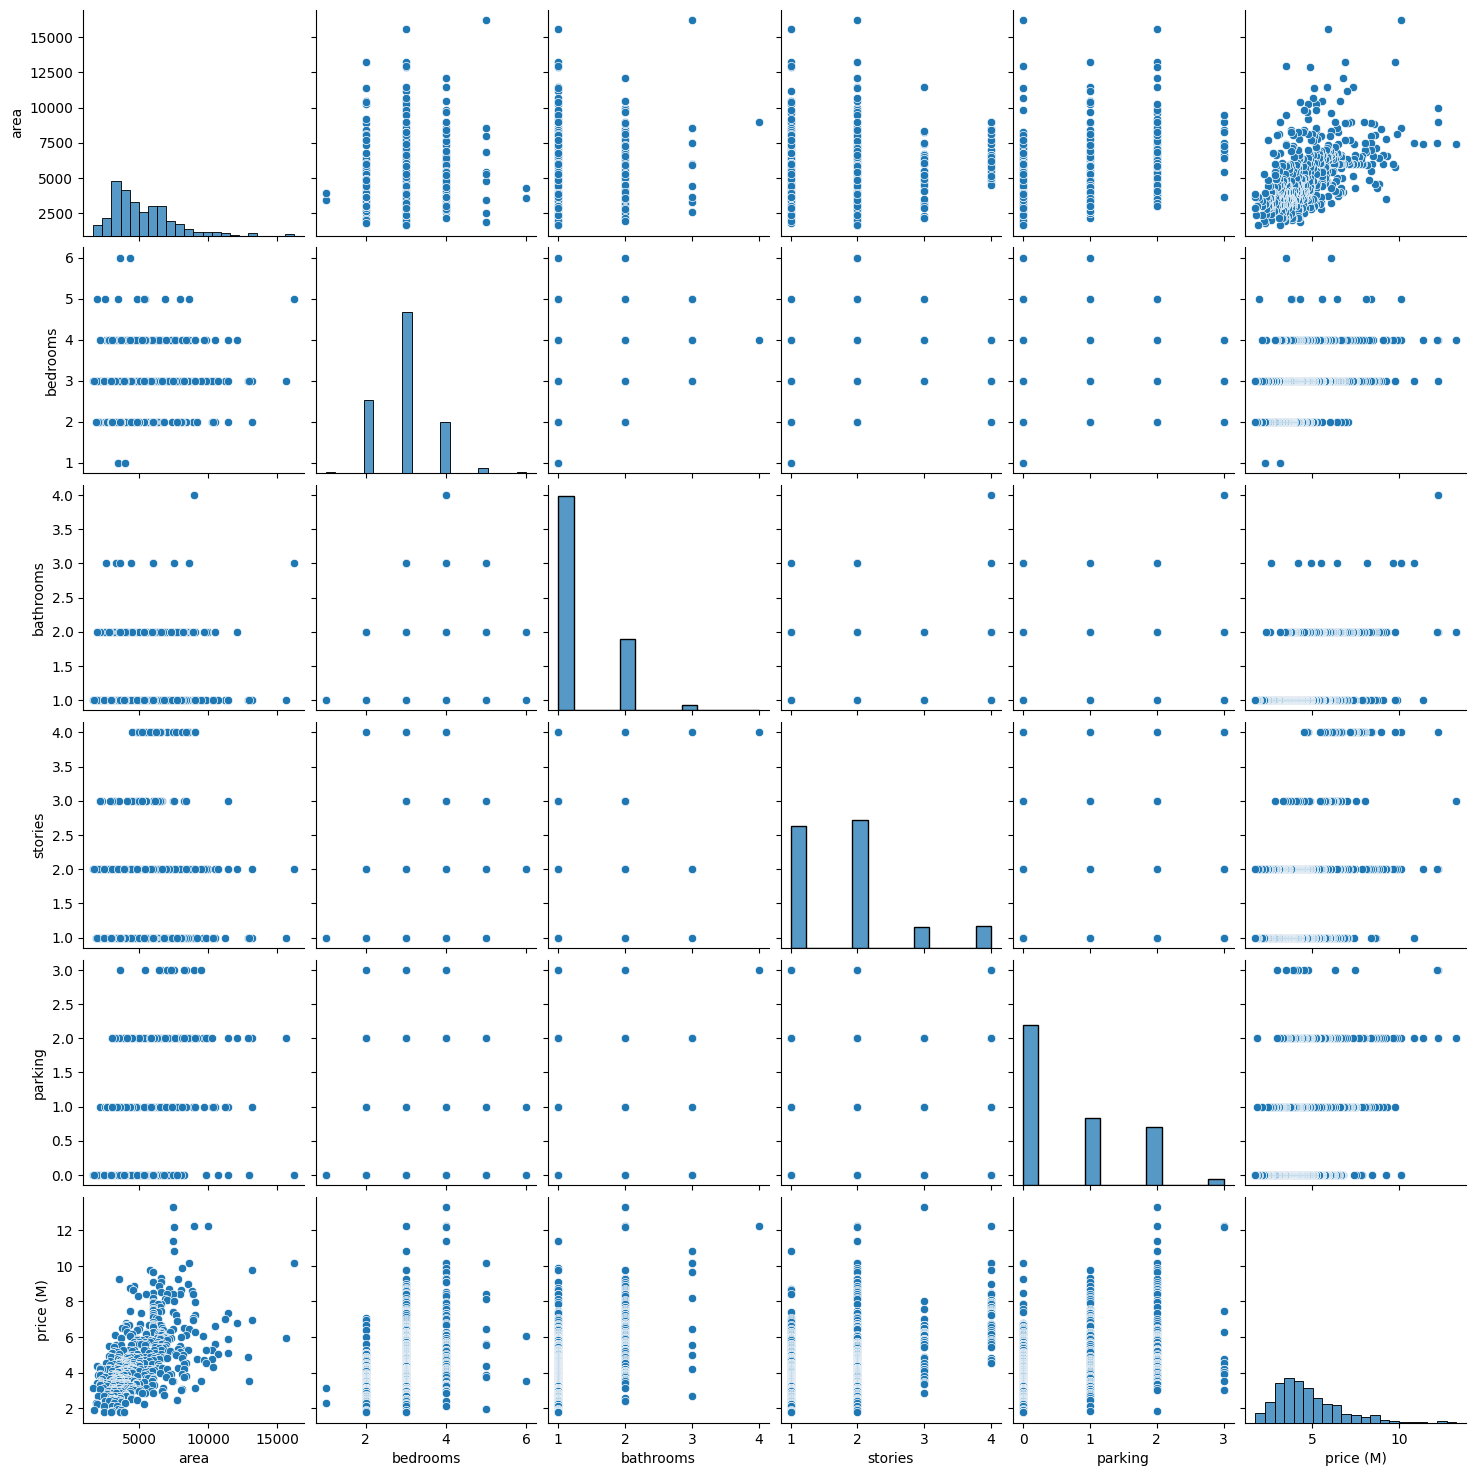

In [23]:
sns.pairplot(data=df)
plt.show()

# 4. Model Building

We split data into `X,y` and then into training, validation, and testing sets.

In [24]:
X = data.drop(columns=['price (M)'])
y = data['price (M)']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

Normalize using `StandardScaler`

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

### 4.1 Linear Regression Model

In [26]:
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred_lin = lin.predict(X_test)
print(f'Mean Squared Error : {mean_squared_error(y_test, y_pred_lin)}')
print(f'R2 Score : {r2_score(y_test, y_pred_lin)}')

Mean Squared Error : 1.7507516675513763
R2 Score : 0.65362996610597


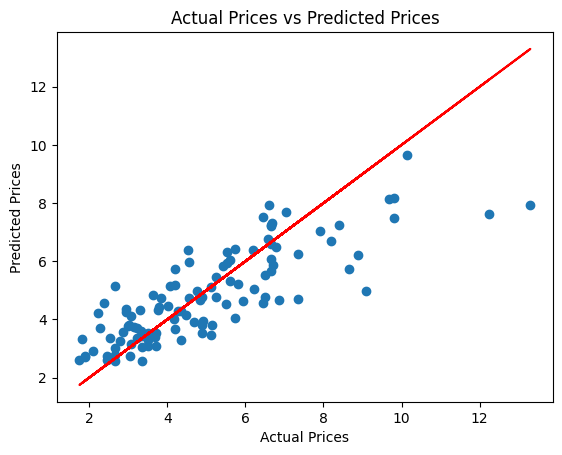

In [27]:
plt.scatter(y_test, y_pred_lin)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

### 4.2 SVM Regression Model (SVR)

In [28]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print(f'Mean Squared Error : {mean_squared_error(y_test, y_pred_svr)}')
print(f'R2 Score : {r2_score(y_test, y_pred_svr)}')

Mean Squared Error : 2.2227935682332007
R2 Score : 0.5602408394988592


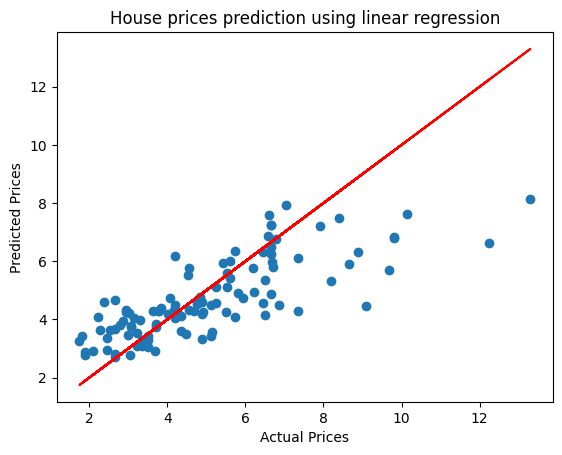

In [29]:
plt.scatter(y_test, y_pred_svr)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('House prices prediction using linear regression')
plt.show()

### 4.3 Decision Tree Regression Model

In [30]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
print(f'Mean Squared Error : {mean_squared_error(y_test, y_pred_dtr)}')
print(f'R2 Score : {r2_score(y_test, y_pred_dtr)}')

Mean Squared Error : 2.6716440989321106
R2 Score : 0.47143991106737304


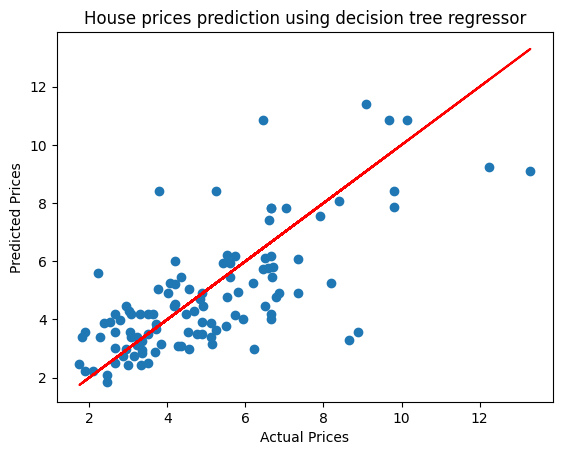

In [31]:
plt.scatter(y_test, y_pred_dtr)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('House prices prediction using decision tree regressor')
plt.show()

### 4.4 Random Forest Regression Model

In [32]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
print(f'Mean Squared Error : {mean_squared_error(y_test, y_pred_rfr)}')
print(f'R2 Score : {r2_score(y_test, y_pred_rfr)}')

Mean Squared Error : 1.9728224532829792
R2 Score : 0.6096953139183707


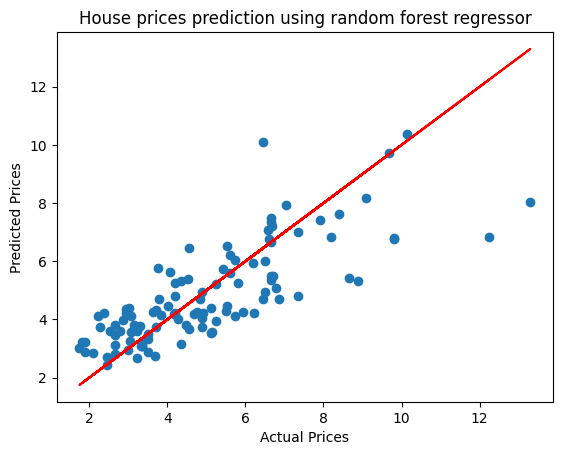

In [33]:
plt.scatter(y_test, y_pred_rfr)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('House prices prediction using random forest regressor')
plt.show()

# Conclusion

Linear Regression model has the best results with MSE 1.75 and R2 Score 0.65